In [1]:
%load_ext autoreload
%autoreload 2

# Analysis of sequence-level mutations

For DPhil thesis.

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from functools import partial

from synbio_morpher.utils.results.analytics.naming import get_true_interaction_cols
from common import set_theme

set_theme(style='whitegrid')
PALETTE = 'viridis'

top_write_dir = os.path.join('data', '25_mutations')

In [ ]:
fn = '../data/raw/summarise_simulation/2024_11_27_145142/tabulated_mutation_info.csv'
data = pd.read_csv(fn)

In [ ]:
data.rename(columns={'mutation_num': 'N mutations'}, inplace=True)
data['Log sensitivity'] = np.log10(data['sensitivity'])

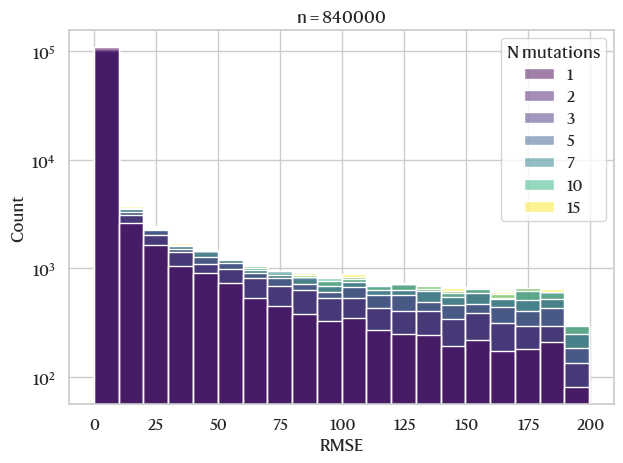

In [ ]:
filt_samp = (data['sample_name'] == 'RNA_2')
filt_m = (data['N mutations'] > 0)
filt = filt_m & filt_samp & (
    data['RMSE'].notnull()) & (data['RMSE'] < np.inf)
g = sns.histplot(data[filt], x='RMSE', hue='N mutations',
             palette=PALETTE,
             bins=20) #, fill=False, element='step')
plt.yscale('log')
plt.title(f'n = {len(data[filt])}')
plt.tight_layout()
plt.savefig(os.path.join(top_write_dir, 'mutation_rmse_histogram.png'), dpi=300, transparent=True)

In [ ]:
get_true_interaction_cols2 = partial(get_true_interaction_cols, remove_symmetrical=True, num_species=data['sample_name'].nunique())

datam = pd.DataFrame()
k = 'energies'
datam[f'{k}_diffs'] = data.groupby(['circuit_name'])[get_true_interaction_cols2(data, k)].apply(
    lambda x: x - x.iloc[0]).melt(value_vars=get_true_interaction_cols2(data, k), 
                                  var_name='idx', value_name=f'{k}_diffs')[f'{k}_diffs']
datam['N mutations'] = data.melt(id_vars = 'N mutations',value_vars=get_true_interaction_cols2(data, k), 
                                  var_name='idx', value_name=f'{k}_diffs')['N mutations']
k = 'Log sensitivity'
data[f'{k}_diffs'] = data.groupby(['circuit_name'])[k].apply(lambda x: x - x.iloc[0]).reset_index()[k]

In [ ]:
sns.histplot(datam, x=f'energies_diffs', hue='N mutations',
             palette=PALETTE, bins=30)
plt.yscale('log')

ValueError: Could not interpret value `energies_diffs` for `x`. An entry with this name does not appear in `data`.